Joint Probability Trees (JPTs) offer a rich representation for joint probability distributions.
This tutorial will guide you through the basic functionalities of JPTs.
To install the package, clone the repository and run the setup file

or install the package via pip when provided the wheel file.

The guiding dataset for this tutorial will be the MNIST Handwritten Digit Recognition dataset.
In this dataset 8x8 greyscale pictures are mapped to the digit (0-9) that is represented by that picture.
To load the dataset, execute the cell below.

In [18]:
from sklearn.datasets import load_digits
mnist = load_digits()

We can now visualize some numbers stored in the dataset to get a feel for it.

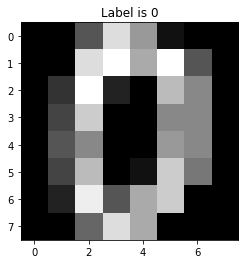

In [19]:
import matplotlib.pyplot as plt
plot_idx = 0
plt.title('Label is {label}'.format(label=mnist["target"][plot_idx]))
plt.imshow(mnist["images"][plot_idx], cmap='gray')
plt.show()

The types and domains of the variables in that dataset can be specified by numeric values for all 64 pixels and one symbolic value for the digit.
These variables can be either created by hand

In [20]:
from jpt.learning.distributions import Numeric, SymbolicType
from jpt.variables import NumericVariable, SymbolicVariable
pixels = ['pixel_%s_%s' % (x1 + 1, x2 + 1) for x1 in range(8) for x2 in range(8)]
pixels = [NumericVariable(pixel, Numeric) for pixel in pixels]
DigitType = SymbolicType('DigitType', list(range(10)))
label = SymbolicVariable('target', domain=DigitType)
variables = [label] + pixels
print(variables)

[target[DigitType(SYM)], pixel_1_1[Numeric(NUM)], pixel_1_2[Numeric(NUM)], pixel_1_3[Numeric(NUM)], pixel_1_4[Numeric(NUM)], pixel_1_5[Numeric(NUM)], pixel_1_6[Numeric(NUM)], pixel_1_7[Numeric(NUM)], pixel_1_8[Numeric(NUM)], pixel_2_1[Numeric(NUM)], pixel_2_2[Numeric(NUM)], pixel_2_3[Numeric(NUM)], pixel_2_4[Numeric(NUM)], pixel_2_5[Numeric(NUM)], pixel_2_6[Numeric(NUM)], pixel_2_7[Numeric(NUM)], pixel_2_8[Numeric(NUM)], pixel_3_1[Numeric(NUM)], pixel_3_2[Numeric(NUM)], pixel_3_3[Numeric(NUM)], pixel_3_4[Numeric(NUM)], pixel_3_5[Numeric(NUM)], pixel_3_6[Numeric(NUM)], pixel_3_7[Numeric(NUM)], pixel_3_8[Numeric(NUM)], pixel_4_1[Numeric(NUM)], pixel_4_2[Numeric(NUM)], pixel_4_3[Numeric(NUM)], pixel_4_4[Numeric(NUM)], pixel_4_5[Numeric(NUM)], pixel_4_6[Numeric(NUM)], pixel_4_7[Numeric(NUM)], pixel_4_8[Numeric(NUM)], pixel_5_1[Numeric(NUM)], pixel_5_2[Numeric(NUM)], pixel_5_3[Numeric(NUM)], pixel_5_4[Numeric(NUM)], pixel_5_5[Numeric(NUM)], pixel_5_6[Numeric(NUM)], pixel_5_7[Numeric(NUM)], 

or infer them automatically from a pandas dataframe

In [21]:
from jpt.variables import infer_from_dataframe
import pandas as pd
import numpy as np

df = pd.DataFrame(data= np.c_[mnist['data'], mnist['target']],
                     columns=['target'] + mnist['feature_names'])
variables = infer_from_dataframe(df)
print(variables)

[target[TARGET_TYPE(NUM)], pixel_0_0[PIXEL_0_0_TYPE(NUM)], pixel_0_1[PIXEL_0_1_TYPE(NUM)], pixel_0_2[PIXEL_0_2_TYPE(NUM)], pixel_0_3[PIXEL_0_3_TYPE(NUM)], pixel_0_4[PIXEL_0_4_TYPE(NUM)], pixel_0_5[PIXEL_0_5_TYPE(NUM)], pixel_0_6[PIXEL_0_6_TYPE(NUM)], pixel_0_7[PIXEL_0_7_TYPE(NUM)], pixel_1_0[PIXEL_1_0_TYPE(NUM)], pixel_1_1[PIXEL_1_1_TYPE(NUM)], pixel_1_2[PIXEL_1_2_TYPE(NUM)], pixel_1_3[PIXEL_1_3_TYPE(NUM)], pixel_1_4[PIXEL_1_4_TYPE(NUM)], pixel_1_5[PIXEL_1_5_TYPE(NUM)], pixel_1_6[PIXEL_1_6_TYPE(NUM)], pixel_1_7[PIXEL_1_7_TYPE(NUM)], pixel_2_0[PIXEL_2_0_TYPE(NUM)], pixel_2_1[PIXEL_2_1_TYPE(NUM)], pixel_2_2[PIXEL_2_2_TYPE(NUM)], pixel_2_3[PIXEL_2_3_TYPE(NUM)], pixel_2_4[PIXEL_2_4_TYPE(NUM)], pixel_2_5[PIXEL_2_5_TYPE(NUM)], pixel_2_6[PIXEL_2_6_TYPE(NUM)], pixel_2_7[PIXEL_2_7_TYPE(NUM)], pixel_3_0[PIXEL_3_0_TYPE(NUM)], pixel_3_1[PIXEL_3_1_TYPE(NUM)], pixel_3_2[PIXEL_3_2_TYPE(NUM)], pixel_3_3[PIXEL_3_3_TYPE(NUM)], pixel_3_4[PIXEL_3_4_TYPE(NUM)], pixel_3_5[PIXEL_3_5_TYPE(NUM)], pixel_3_6[PIX

As we can see all variables got loaded correctly. Since the target variable is technically speaking a numeric variable we need to change the variable for our purposes.

In [22]:
variables[0] = label
print(variables)

[target[DigitType(SYM)], pixel_0_0[PIXEL_0_0_TYPE(NUM)], pixel_0_1[PIXEL_0_1_TYPE(NUM)], pixel_0_2[PIXEL_0_2_TYPE(NUM)], pixel_0_3[PIXEL_0_3_TYPE(NUM)], pixel_0_4[PIXEL_0_4_TYPE(NUM)], pixel_0_5[PIXEL_0_5_TYPE(NUM)], pixel_0_6[PIXEL_0_6_TYPE(NUM)], pixel_0_7[PIXEL_0_7_TYPE(NUM)], pixel_1_0[PIXEL_1_0_TYPE(NUM)], pixel_1_1[PIXEL_1_1_TYPE(NUM)], pixel_1_2[PIXEL_1_2_TYPE(NUM)], pixel_1_3[PIXEL_1_3_TYPE(NUM)], pixel_1_4[PIXEL_1_4_TYPE(NUM)], pixel_1_5[PIXEL_1_5_TYPE(NUM)], pixel_1_6[PIXEL_1_6_TYPE(NUM)], pixel_1_7[PIXEL_1_7_TYPE(NUM)], pixel_2_0[PIXEL_2_0_TYPE(NUM)], pixel_2_1[PIXEL_2_1_TYPE(NUM)], pixel_2_2[PIXEL_2_2_TYPE(NUM)], pixel_2_3[PIXEL_2_3_TYPE(NUM)], pixel_2_4[PIXEL_2_4_TYPE(NUM)], pixel_2_5[PIXEL_2_5_TYPE(NUM)], pixel_2_6[PIXEL_2_6_TYPE(NUM)], pixel_2_7[PIXEL_2_7_TYPE(NUM)], pixel_3_0[PIXEL_3_0_TYPE(NUM)], pixel_3_1[PIXEL_3_1_TYPE(NUM)], pixel_3_2[PIXEL_3_2_TYPE(NUM)], pixel_3_3[PIXEL_3_3_TYPE(NUM)], pixel_3_4[PIXEL_3_4_TYPE(NUM)], pixel_3_5[PIXEL_3_5_TYPE(NUM)], pixel_3_6[PIXEL

Before training a model we should talk about the hyperparameters and their influences on the model. Additionally, to the variables one can specify targets, min_samples_leaf, min_impurity_improvement and variable_dependencies.
The targets specify the variables which impurity shall be decreased.
On the target values no splits will be calculated.
min_samples_leaf specifies the minimal amount of samples that are required to form a leaf.
This is the most important hyperparameter since it constraints the complexity and accuracy that can be achieved by the tree. min_impurity_improvement specifies how much purity needs to be achieved by a split to be considered for the tree. variable_dependenciesis a map that states for every variable all dependent variables. This will guide the search in a way that impurity improvements are only measured among dependent variables. This can be used to reduce the runtime of the training process for large amounts of training data in high dimensions.

To now specify a tree we will set the min_samples_leaf parameter to 100.

In [23]:
from jpt.trees import JPT

tree = JPT(variables=variables, min_samples_leaf=100)
tree.learn(data=df)

2022-05-09 09:50:33 -   INFO   - Preprocessing data...
2022-05-09 09:50:38 -   INFO   - Data transformation... 1797 x 65
2022-05-09 09:50:38 -   INFO   - Learning prior distributions...
2022-05-09 09:50:38 -   INFO   - Prior distributions learnt in 0:00:00.041147.
2022-05-09 09:50:38 -   INFO   - Started learning of 1797 x 65 at 2022-05-09 09:50:38.908408 requiring at least 100 samples per leaf
2022-05-09 09:50:38 -   INFO   - Learning is generative. 
2022-05-09 09:50:39 -   INFO   - Learning took 0:00:00.347191


One now may be interested in inferring probabilities from the tree.
For example, given that the digit is a 0 the probability distributions of all pixels can be inferred with

In [24]:
evidence = {variables[0]:0}
result = tree.expectation(variables=variables[1:],evidence=evidence)
print(result)

<VariableMap {pixel_0_0: <jpt.trees.ExpectationResult object at 0x7fabe5e70970>,pixel_0_1: <jpt.trees.ExpectationResult object at 0x7fabe5e70a30>,pixel_0_2: <jpt.trees.ExpectationResult object at 0x7fabe5e70df0>,pixel_0_3: <jpt.trees.ExpectationResult object at 0x7fabe5e7a4f0>,pixel_0_4: <jpt.trees.ExpectationResult object at 0x7fabe5e7abb0>,pixel_0_5: <jpt.trees.ExpectationResult object at 0x7fabe5e0e2b0>,pixel_0_6: <jpt.trees.ExpectationResult object at 0x7fabe5e0e970>,pixel_0_7: <jpt.trees.ExpectationResult object at 0x7fabe5e0eeb0>,pixel_1_0: <jpt.trees.ExpectationResult object at 0x7fabe5e11250>,pixel_1_1: <jpt.trees.ExpectationResult object at 0x7fabe5e113d0>,pixel_1_2: <jpt.trees.ExpectationResult object at 0x7fabe5e11a90>,pixel_1_3: <jpt.trees.ExpectationResult object at 0x7fabe5e0f190>,pixel_1_4: <jpt.trees.ExpectationResult object at 0x7fabe5e0f850>,pixel_1_5: <jpt.trees.ExpectationResult object at 0x7fabe5e0ff10>,pixel_1_6: <jpt.trees.ExpectationResult object at 0x7fac0914e5

Furthermore the plotting method may be interesting. Sadly this doesnt work with jupyter notebooks since the plots are written to disk.
Anyways the plots can be generated with tree.plot(plotvars=tree.variables)